In [13]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

res = []

for i in range (1,100):
    lambda_ = i
    dist_exp = sts.expon(1/lambda_)
    ints_exp = dist_exp.rvs(10000)

    dist_u = sts.uniform(0,2*lambda_)
    ints_u = dist_u.rvs(10000)

    res.append((lambda_, np.mean((ints_exp,ints_u), axis = 1)))

res

[(1, array([2.01400451, 0.99078894])),
 (2, array([1.4884173 , 1.99435748])),
 (3, array([1.33205528, 2.98836699])),
 (4, array([1.25131404, 4.00732038])),
 (5, array([1.20805005, 5.03393925])),
 (6, array([1.15846641, 6.01889937])),
 (7, array([1.13863515, 7.04990263])),
 (8, array([1.11665051, 7.93797509])),
 (9, array([1.12195061, 9.00035747])),
 (10, array([ 1.1049614 , 10.04902013])),
 (11, array([ 1.08684712, 10.94428025])),
 (12, array([ 1.08472122, 11.95937525])),
 (13, array([ 1.0745223 , 13.01944214])),
 (14, array([ 1.07435682, 13.94687253])),
 (15, array([ 1.08163748, 14.85574842])),
 (16, array([ 1.06031977, 16.0086095 ])),
 (17, array([ 1.05578371, 16.9398764 ])),
 (18, array([ 1.04347255, 17.95135275])),
 (19, array([ 1.0330065 , 19.01379016])),
 (20, array([ 1.04962067, 19.94802739])),
 (21, array([ 1.0536907, 21.0842428])),
 (22, array([ 1.05467013, 21.96218007])),
 (23, array([ 1.04360904, 23.23556792])),
 (24, array([ 1.03842718, 24.03592667])),
 (25, array([ 1.02523

In [1]:
data = {
    50: 0.00832,
    51: 0.00911,
    52: 0.00996,
    53: 0.01089,
    54: 0.01190,
    55: 0.01300,
    56: 0.01421,
    57: 0.01554,
    58: 0.01700,
    59: 0.01859,
    60: 0.02034,
    61: 0.02224,
    62: 0.02431,
    63: 0.02657,
    64: 0.02904,
    65: 0.03175,
    66: 0.03474,
    67: 0.03804,
    68: 0.04168,
    69: 0.04561,
    70: 0.04979,
    71: 0.05415,
    72: 0.05865,
    73: 0.06326,
    74: 0.06812,
    75: 0.07337,
    76: 0.07918,
    77: 0.08570,
    78: 0.09306,
    79: 0.10119,
    80: 0.10998,
    81: 0.11935,
    82: 0.12917,
    83: 0.13938,
    84: 0.15001,
    85: 0.16114,
    86: 0.17282,
    87: 0.18513,
    88: 0.19825,
    89: 0.21246,
    90: 0.22814,
    91: 0.24577,
    92: 0.26593,
    93: 0.28930,
    94: 0.31666,
    95: 0.35124,
    96: 0.40056,
    97: 0.48842,
    98: 0.66815,
    99: 0.72000,
    100: 0.76000,
    101: 0.80000,
    102: 0.85000,
    103: 0.90000,
    104: 0.96000,
    105: 1.00000}

mean:  1403912.2412462207
std:  1227125.3509357932


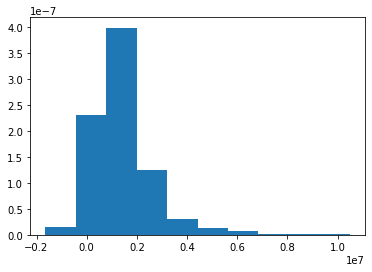

mean:  80.177
std:  6.358747596814958


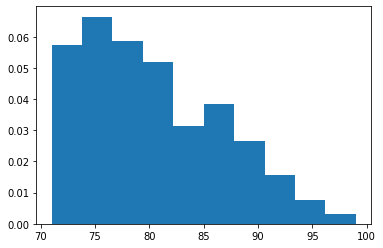

In [6]:
class FannieMae:
    def __init__(self, money=150000, age=50, interest_dist=sts.norm(loc = 0.08, scale = 0.09), life_prob=data):

        self.dead = False
        self.money = money
        self.age = age
        self.interest_dist = interest_dist
        self.life_prob = life_prob

    def update_money(self):
        if self.age >= 70:
            self.money -= 65000
        else:
            self.money += 10000
        
        self.money = self.money * (1+ self.interest_dist.rvs())
    
    def aging(self):
        self.age += 1
        if self.age > 70:
            if np.random.random() < self.life_prob[self.age]:
                self.dead = True


    def sim(self):
        while not self.dead:
            self.aging()
            self.update_money()
        return self.money, self.age


moneys = []
ages = []

for _ in range(1000):
    fannie = FannieMae()
    moneys.append(fannie.sim()[0])
    ages.append(fannie.sim()[1])


print('mean: ', np.mean(moneys))
print('std: ', np.std(moneys))
plt.hist(moneys, density=True)
plt.show()

print('mean: ', np.mean(ages))
print('std: ', np.std(ages))
plt.hist(ages, density=True)
plt.show()